## POSTTEST05
## Rausyanfikr Adi Karmayoga 
## 2009106020

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#### Dataset

In [48]:
df = pd.read_csv('data-credit-card clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   600 non-null    object 
 1   Gender               600 non-null    object 
 2   Age                  600 non-null    int64  
 3   Region_Code          600 non-null    object 
 4   Occupation           600 non-null    object 
 5   Channel_Code         600 non-null    object 
 6   Vintage              600 non-null    float64
 7   Credit_Product       600 non-null    object 
 8   Avg_Account_Balance  600 non-null    int64  
 9   Is_Active            600 non-null    object 
 10  Is_Lead              600 non-null    int64  
 11  CreditProduct_No     600 non-null    float64
 12  CreditProduct_Yes    600 non-null    float64
 13  IsActive_No          600 non-null    float64
 14  IsActive_Yes         600 non-null    float64
dtypes: float64(5), int64(3), object(7)
memor

In [49]:
df.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,CreditProduct_No,CreditProduct_Yes,IsActive_No,IsActive_Yes
0,NNVBBKZB,Female,73,RG268,Other,X3,43.0,No,1045696,No,0,1.0,0.0,1.0,0.0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32.0,No,581988,No,0,1.0,0.0,1.0,0.0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26.0,No,1484315,Yes,0,1.0,0.0,0.0,1.0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19.0,No,470454,No,0,1.0,0.0,1.0,0.0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33.0,No,886787,No,0,1.0,0.0,1.0,0.0


#### Membuang atribut tipe data objek dan membuat atribut <b>Is_Active</b> sebagai label

In [50]:
x = df.drop(['ID','Is_Active', 'CreditProduct_No', 'CreditProduct_Yes', 'IsActive_No', 'IsActive_Yes'], axis=1)
y = df['Is_Active']
x.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Lead
0,Female,73,RG268,Other,X3,43.0,No,1045696,0
1,Female,30,RG277,Salaried,X1,32.0,No,581988,0
2,Female,56,RG268,Self_Employed,X3,26.0,No,1484315,0
3,Male,34,RG270,Salaried,X1,19.0,No,470454,0
4,Female,30,RG282,Salaried,X1,33.0,No,886787,0


#### Membuat data x menjadi encoding

In [51]:
X = pd.get_dummies(x)
X.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,...,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes
0,73,43.0,1045696,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,30,32.0,581988,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,56,26.0,1484315,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,34,19.0,470454,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,30,33.0,886787,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


## Algoritma K-Nearest Neighbor

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [53]:
knn_train = knn.score(x_train, y_train)
knn_test = knn.score(x_test, y_test)

print('Score training set model KNN :', knn_train)
print('Score test set model KNN     :', round(knn_test, 4))

Score training set model KNN : 0.71875
Score test set model KNN     : 0.4917


## Algoritma Naïve Bayes

In [54]:
gs = GaussianNB()
gs.fit(x_train, y_train)

GaussianNB()

In [55]:
naivbay_train = gs.score(x_train, y_train)
naivbay_test = gs.score(x_test, y_test)

print('Score training set model Naive Bayes :', round(naivbay_train, 4))
print('Score test set model Naaive Bayes    :', round(naivbay_test, 4))

Score training set model Naive Bayes : 0.6167
Score test set model Naaive Bayes    : 0.5917


## Perbandingan Model Menggunakan Grafik

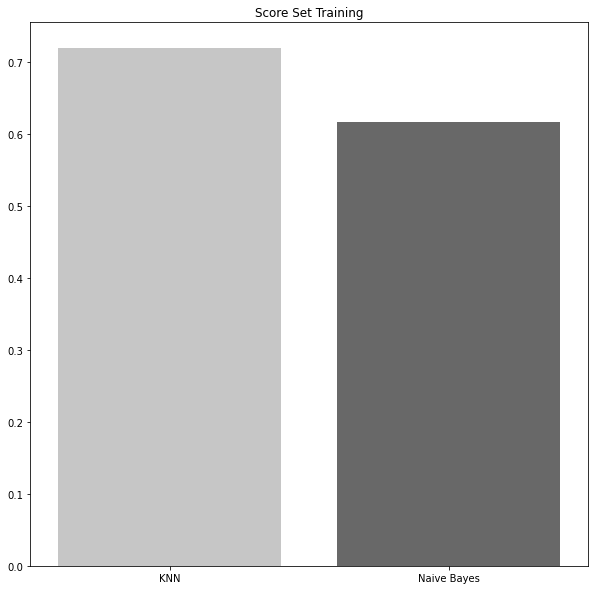

In [56]:
algoritma = ["KNN","Naive Bayes"]
pred_train = [knn_train, naivbay_train]
plt.figure(figsize=(10,10))
sns.barplot(x = algoritma, y = pred_train, palette='Greys')
plt.title("Score Set Training")
plt.show()

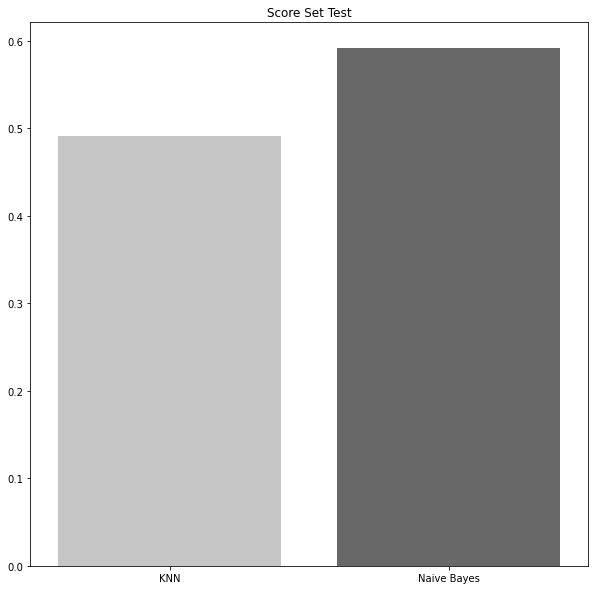

In [57]:
algoritma = ["KNN","Naive Bayes"]
pred_train = [knn_test, naivbay_test]
plt.figure(figsize=(10,10))
sns.barplot(x = algoritma, y = pred_train, palette='Greys')
plt.title("Score Set Test")
plt.show()